In [1]:
### Prophet Model from FB to be sued in times series forecasting

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# import the dataset
df = pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
print(df.head())
print(df.info())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None


In [4]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

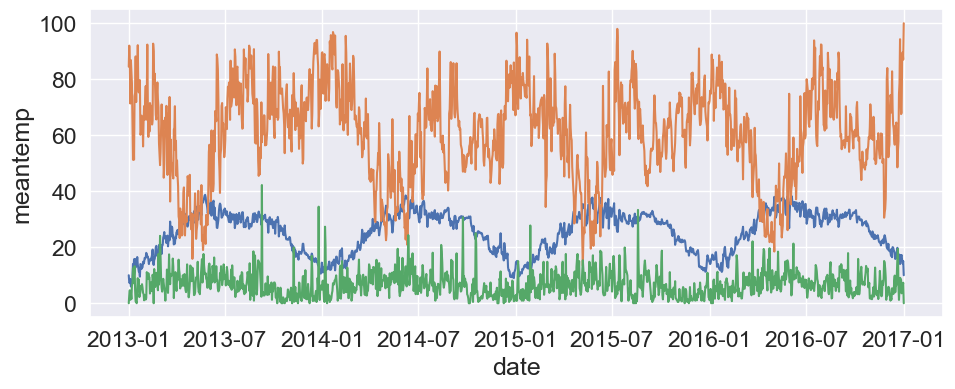

In [5]:
# draw a line plot using seaborn
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=1.5, style='darkgrid')
sns.lineplot(data=df, x='date', y='meantemp')
sns.lineplot(data=df, x='date', y='humidity')
sns.lineplot(data=df, x='date', y='wind_speed')
# sns.lineplot(data=df, x='date', y='meanpressure')

In [6]:

# draw the same plot using plotly
fig = px.line(df, x=df.index, y='meantemp', title='Mean Temperature in Delhi')
fig.show()

c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [7]:
# make a scatter plot b/w meanteamp and humidity
fig = px.scatter(df, x='meantemp', y='humidity', title='Scatter plot b/w mean temperature and humidity',
                 trendline='ols', trendline_color_override='red')
fig.show()

In [8]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['meantemp'], df['humidity'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.572


Increase in humidity can also decrease the temperature of the air. This is because the heat capacity of water is much higher than that of air. This means that the air can absorb more heat when it is humid. This is why we sweat more on humid days.

<Axes: >

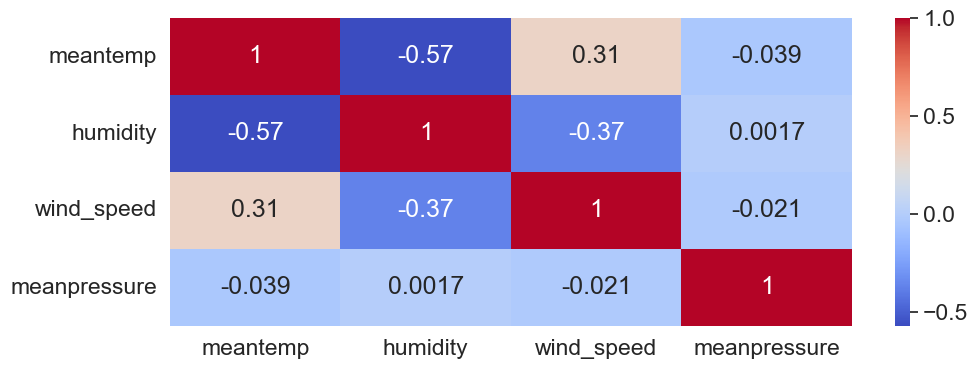

In [9]:
# make a heatmap of the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [10]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


<Axes: >

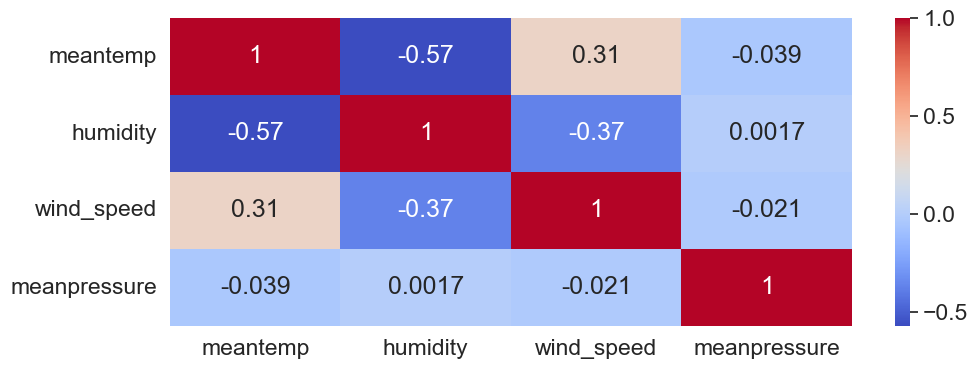

In [11]:
# make a correlation matrix of the scaled data
corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='date', ylabel='meantemp'>

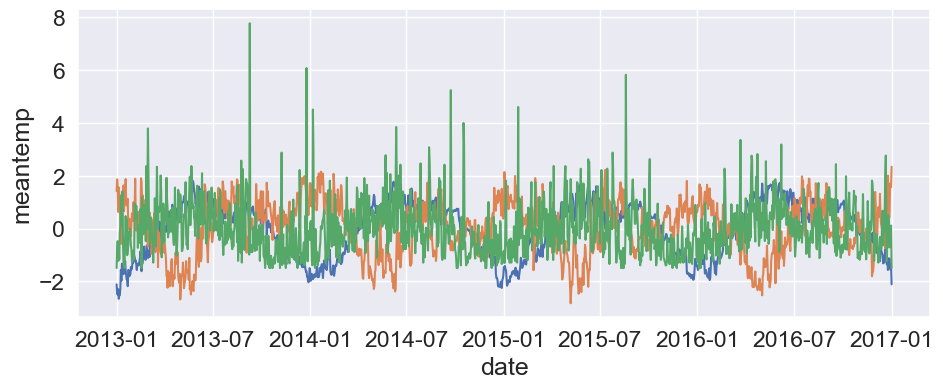

In [12]:
# draw a line plot after scaling data using seaborn
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=1.5, style='darkgrid')
sns.lineplot(data=df_scaled, x='date', y='meantemp')
sns.lineplot(data=df_scaled, x='date', y='humidity')
sns.lineplot(data=df_scaled, x='date', y='wind_speed')
# sns.lineplot(data=df_scaled, x='date', y='meanpressure')

In [13]:
# draw the same plot using plotly
fig = px.line(df, x=df.index, y='meanpressure', title='Mean Temperature in Delhi')
fig.show()

c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



We saw that the meanpressure is much higher on 28th march of 2016, It is an anomaly in the dataset, so we can remove it. 

In [14]:
# interpolate the outliers from mean pressure column on 28.march.2016
df.loc['2016-03-08', 'meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-08']

meantemp          23.428571
humidity          60.214286
wind_speed         6.742857
meanpressure    1012.209821
Name: 2016-03-08 00:00:00, dtype: float64

In [15]:
# add two columns in the dataset for month and year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,1,2013


(0.0, 12.0)

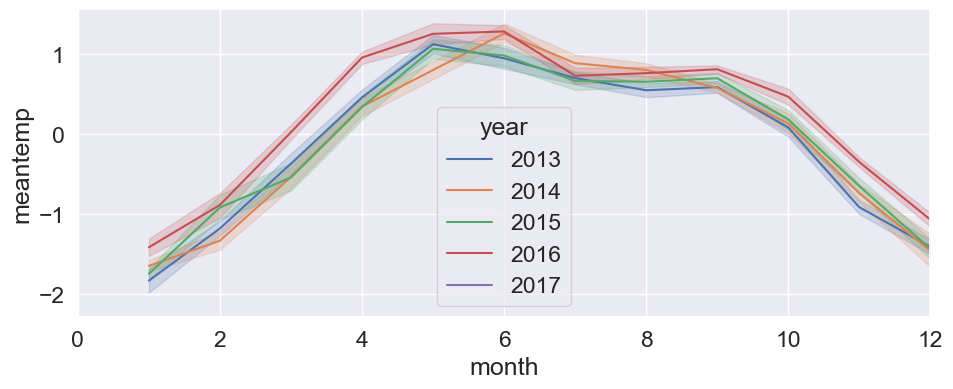

In [16]:
# make line plot of mean temperature for each month
sns.lineplot(data=df_scaled, x='month', y='meantemp', hue='year', palette='deep')
plt.xlim(0, 12)

In [17]:
# same in plotly 
fig = px.line(df_scaled, x=df_scaled.index, y='meantemp', title='Mean Temperature in Delhi', color='year')
fig.show()

c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [18]:
# add two columns in the dataset for month and year
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [19]:
fig = px.line(df, x=df.index, y='meantemp', title='Mean Temperature in Delhi', color='year')
fig.show()

c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [20]:
# Let's use the prophet model from python to forecast the mean temperature

In [21]:
# import the dataset with index
df = pd.read_csv('DailyDelhiClimateTrain.csv')
print(df.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [22]:
#rename the columns
df = df.rename(columns={'date': 'ds', 'meantemp': 'y'})
print(df.head())

           ds          y   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [23]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [24]:
# call the model
model = Prophet()
model.fit(df)

forecast = model.make_future_dataframe(periods=365)
prediction = model.predict(forecast)
prediction.head()

11:51:50 - cmdstanpy - INFO - Chain [1] start processing
11:51:51 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,9.231793,14.397215,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.436223,14.340325,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.338559,14.411383,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.120877,14.308844,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.047939,14.327896,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373


In [25]:
# plot the forecast
fig = plot_plotly(model, prediction)
fig.show()

c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Muhammad Haroon\.conda\envs\tf_env\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\Muhammad Haro

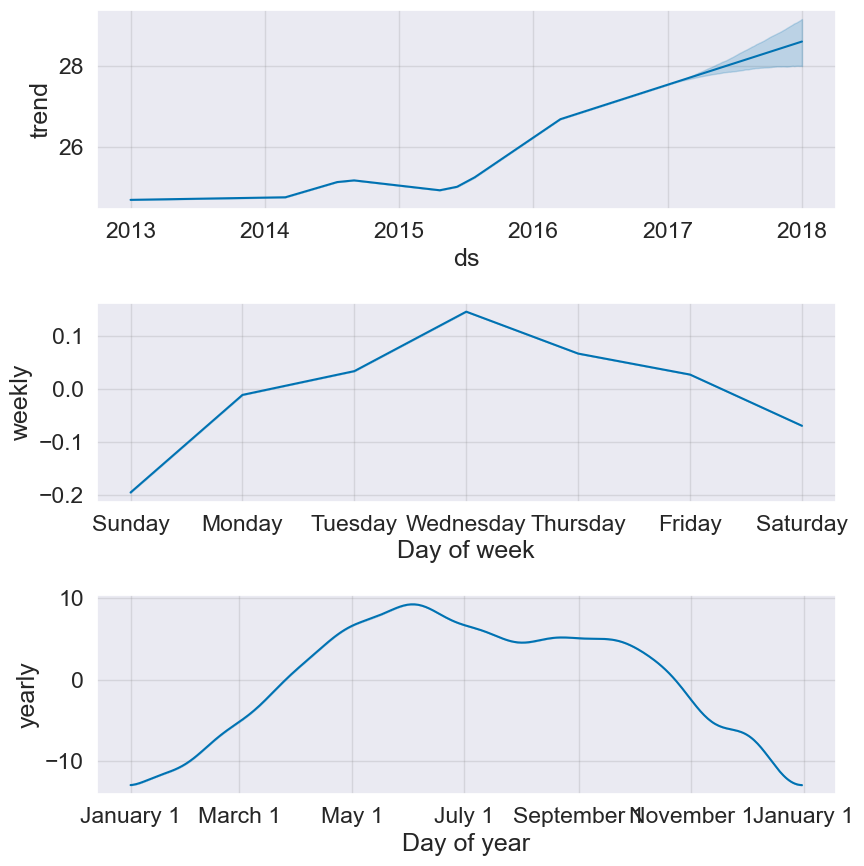

In [26]:
fig1 = model.plot_components(prediction)
fig1.show()

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')